# QSVC and Hybrid Neural Network

## The classical algorithms and concepts

## SVM

* **Goal :** to construct an hyperplane to achieve a classification (or a regression task).  
* **Best case :** The hyperplane is the furthest away from the data points it separate. The highest the margin, the highest the generalization is.
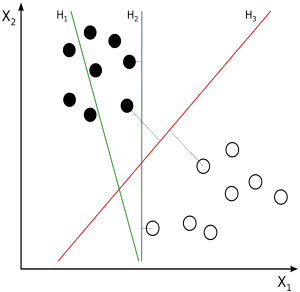
* Do not hesitate to use the kernel trick (introduce a kernel that transforms the data to a higher dimension space) to render your data linearly separable.

### The linear case
 
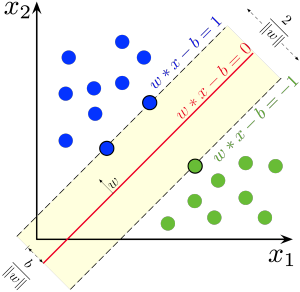

**Goal :** find $\mathcal{w}$ and $\mathcal{b}$ such that $||\mathcal{w}||$ is minimal.

### Two cases : 
* The data is linearly separable (you can draw an hyperplane without wrongly classified data) : **Hard Margin**.
The optimization problem becomes "Minimize $||\mathcal{w}||$ subject to $\mathcal{y}_i(\mathcal{w}^Tx_i-\mathcal{b}) \geq 1$ for i = 1,...,n"
* The data is not linearly separable : **Soft Margin**
The optimization problem is to "Minimize $\lambda ||\mathcal{w}||^2+[\frac{1}{n}\sum_{i = 1}^n max(0,1-\mathcal{y}_i(\mathcal{w}^Tx_i-\mathcal{b}))]$"
with $\lambda$ an hyper parameter that determines how much data is allowed on the wrong size of the vector.


### SVM with multiple classes
| One to One | One to Rest |
:---:|:---:
|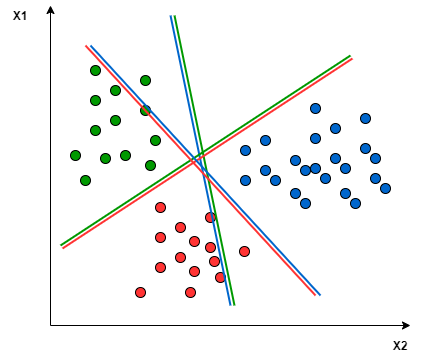 | 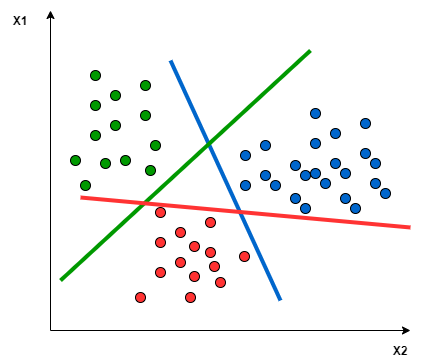|

### Non Linear Kernel
The choice of kernel is crucial when classifying data and sometimes, a linear kernel is not giving a generalisation that allows the data to be classified correctly.
For example, the following datasets are wrongly classified by a linear classifier, but correctly by a RBF classifier : 
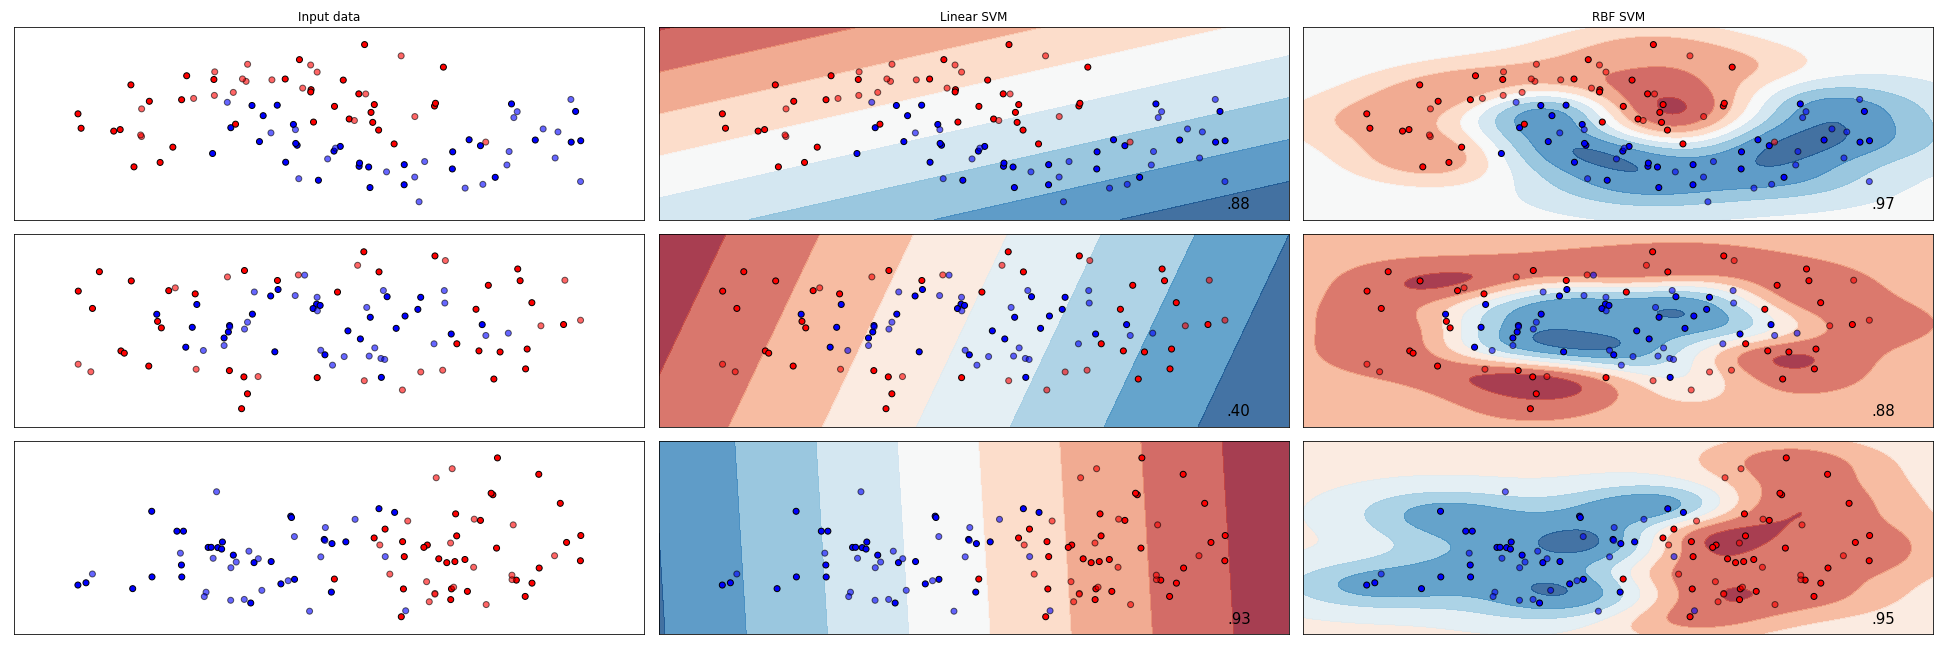
The only difference between the two being the type of kernel used. The RBF kernel is defined by : 
$$ K(x,x') = exp(-\frac{||x-x'||^2}{2\sigma^2})$$, $\sigma$ being an hyper parameter that controls the radius at which a datapoint is condidered inside a class or not.

### Primal and Dual problems
In optimisation (of which machine learning is a sub field), there are two ways to define a problem : the primal and the dual form.  
While the primal problem will always be a minimisation problem, the dual problem will be its equivalent as a maximisation problem.  
For example, if you want to find the smallest number between 0 and 10, written like so : 
$$ \text{min} 3x_1 + 2x_2 \\ \text{s.t : } 9x_1 - x_2 \geq 10 \\ x_1+3x_2 \geq 7 \\ x_1,x_2 \geq 0$$  
Then the dual problem is : 
$$\text{max} 10y_1+7y_2 \\ \text{s.t : } 9y_1 + y_2 \leq 3 \\ -y_1+3y_2 \leq 2 \\ y_1,y_2 \geq 0$$
Then, if $(x_1,x_2)$ is a solution of the primal problem, then the pair is also a solution of the dual problem.

### General form of Support Vector Machine problem
We saw above that solving the SVM problem is equivalent to solving this optimisation problem : 
$$ min_{w \in \mathbb{R}^s} \frac{\lambda}{2}||w||^2 + \sum_{i = 1}^Mmax\{0,1-y_i(w^T\varphi(x_i))\}$$
From this problem, we can define its dual problem :  
$$max_{\alpha_i\in\mathbb{R}} \sum_{i = 1}^M \alpha_i - \frac{1}{2}\sum_{i,j = 1}^M \alpha_i\alpha_jy_iy_jk(x_i,x_j) - \frac{\lambda}{2}\sum_{i = 1}^M\alpha_i^2 \\ \text{s.t : } 0\leq \alpha_i, \forall i = 1,...,M$$
with $k(x_i,x_j)$ the evaluation of a kernel function for the vectors $x_i$ and $x_j$.  
Thus, solving the SVM problem with a kernel is equivalent to solving the second equation.


## Neural networks

### The neuron : the basis of a neural network
A neuron is composed of three components : 
* A set of parameters : the weights $w$ and the bias $b$. $w$ is a vector and $b$ is a float.
* An activation function : an activation function $\sigma$ is a function that takes output of the last neurons and its own parameters to output a result between 0 and 1 that represents the activation (or non activation of a neuron).  


### Computations inside of the neuron
<div>
  <img style="float: left" src="https://i.postimg.cc/bJSq1NWH/neuron-computing.png">
  <span style="">We are intersted in computing the output of the green neuron. For this neuron, we define an activation function $\sigma$ as saw above and a bias $b_{1,0}$.<br>Computing the output of the neuron is equivalent to compute $$out = \sigma(w_{0,0}a_0^{(0)}+w_{0,1}a_1^{(0)}+w_{0,2}a_2^{(0)}+w_{0,3}a_3^{(0)}+b_{1,0})$$<br> The activation of the other neurons of the second layer can have different weights going to them and different bias. However, it is uncommon to change the activation function inside one layer.<br>More generaly, to compute the vector $(a_0^{(i)}, ..., a_n^{(i)})$, you can use the formula $\sigma(Wa^{(i)}+b)$ where $W$ is a matrix composed of the vectors $(w_{k,0},...,w_{k,n})$ on its rows and $b$ is a vector composed of the differnet bias for each neurons of the next layer.<br><br>Computing the formula above is called <strong>feed-forwarding</strong>.</span>
</div>


### Activation function
The activation function ($\sigma$ in the slide above) is a function that defines the output of a neuron depending on the inputs or the set of inputs. These functions are useful to add a better generalisation in the neural network.  
The most straight-forward activation function is $$ \sigma : y \rightarrow  \begin{cases} 0 \text{ if $y$ <= 0.5}\\ 1 \text{ otherwise}\end{cases}$$
But this activation function does not leave much room for nuancing.  
The two most used functions are :
* ReLu (Rectified Linear unit function) : $$\sigma : x,W,b \rightarrow max(0,Wx+b)$$
* Gaussian : $$\sigma : x,W,b \rightarrow exp(-\frac{||W-c||^2}{2s^2})$$ with $c$ and $s$ two hyper-parameters controlling the center and the radius of the activation function

### Optimizing the parameters
In a neural network we have two parameters to optimize per layers : $W$ and $b$. The optimisation process is similar to the optimisation process of a non neural network machine learning algorithm : 
* Compute a cost function (of your choice).
* Optimize the parameters related to the evaluation of the cost function. Usually, Gradient Descent is used, but some other optimization function can be used.  

The process of optimizing the parameters after computing the cost function is called **backpropagation**

### Computing the gradient : the chain rule
To execute the gradient descent algorithm, one must compute the gradient of the cost function, noted $C$. the gradient must be computed in realtion with the variation of $w$ and $b$. If we call $w^{(i)}$ the weight matrix for the $i$-th layer and $b^{(i)}$ the bias vector, then the gradient we are interested in is : <br>
$$\nabla C = \begin{bmatrix}
\frac{\partial C}{\partial w^{(0)}} \\
\frac{\partial C}{\partial b^{(0)}} \\
\vdots \\
\frac{\partial C}{\partial w^{(L)}} \\
\frac{\partial C}{\partial b^{(L)}} 
\end{bmatrix}$$

For example, considering that we have :   
$$\begin{align}
C &= \sum_{j=0}^{n_L-1}(a_j^{(L)} - y_j)^2 \\
z_j^{(L)} &= \sum_{k = 0}^{n_a}w_{j,k}^{(L)}a_j^{(L-1)}+b_k^{(L)}\\
a_j^{(L)} &= \sigma(z_j^{(L)})
\end{align}$$<br>

Considering these equations, computing this partial derivative $\frac{\partial C}{\partial w^{(L)}}$ can be done using the chain rule : $\frac{\partial C}{\partial w^{(L)}} = \frac{\partial z^{(L)}}{\partial w^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C}{\partial a^{(L)}}$.  
And the same decomposition can be applied to the partial derivative $\frac{\partial C}{\partial b^{(L)}}$.

# The Quantum way

# QSVM

### QSVC : inside the code
The computation of the QSVC algorithm in Qiskit is particular because it uses the SVM object of scikit-learn, and compute the kernel by evaluating two feature maps reunited on a quantum processor. The circuit construct the following state : 
$$|\psi(y)\rangle^\dagger|\psi(x)\rangle|0\rangle$$
And taking the average of the amplitudes of the measurement gives the kernel evaluation (the scalar product).  
Once this kernel has been computer, the standard optimization of the SVM applies.

### QSVM in Qiskit

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit.providers.aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2, PauliFeatureMap
from qiskit.circuit import ParameterVector
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms.classifiers import QSVC, VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit.algorithms.optimizers import SPSA, COBYLA
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from IPython.display import clear_output
from utils import *
import time

### Using the Ad-Hoc data function

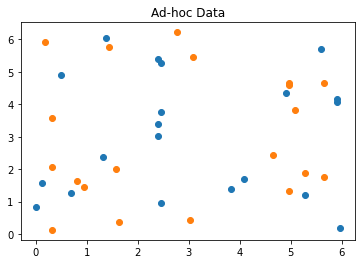

In [2]:
feature_dim = 2
train_data, train_labels, test_data, test_labels = (ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
))

The input of the QSVC function requires the labels to be in the form $[1,2,1,1,2,\dots]$ rather than in the form $[[1,0],[0,1],[1,0],[1,0],[0,1],\dots]$, which corresponds to the output of the ad_hoc_data function.

In [3]:
train_labels_one = [int("".join(str(int(x)) for x in label),2) for label in train_labels]
test_labels_one = [int("".join(str(int(x)) for x in label),2) for label in test_labels]
print(train_labels_one)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


The selected feature map (a ZZFeatureMap here), has to be given to a QuantumKernel object, which adds the computation for the inner product of the two kernels.  
The verbose argument will only output ```[LibSVM]```.

In [4]:
backend = AerSimulator(method = 'automatic')
qinst = QuantumInstance(backend=backend)
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
kernel = QuantumKernel(feature_map = feature_map, quantum_instance=qinst)
qsvc = QSVC(quantum_kernel=kernel, verbose = True)
qsvc.fit(train_data,train_labels_one)

[LibSVM]

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x000001DF6A5A7370>,
     random_state=None, shrinking=True, tol=0.001, verbose=True)

We can then compute the training and testing score for our model and data : 

In [10]:
print("Training score : ",qsvc.score(train_data,train_labels_one))
print("Testing score : ",qsvc.score(test_data,test_labels_one))

Training score :  1.0
Testing score :  1.0


# The MNIST dataset

Using the MNIST dataset is still problematic in this case. Even if a classical SVM has one of the best results in classifying the MNIST dataset, the QSVM algorithm performs poorly (per my testing and this paper https://arxiv.org/pdf/2012.07725.pdf) and is slow. You can find below a graph of the evolution of the time taken to execute the QSVM algorithm against the amount of features you give it (with the same feature map, ran on a simulator) : 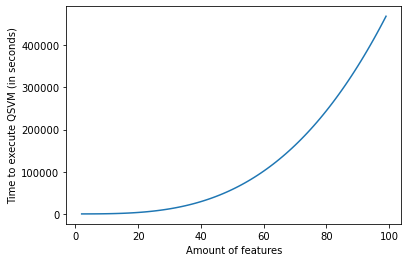  


It was also tried to benchmark the amount of time it would take to run the QSVC algorithm depending on the amount of images you send it, resulting in the following graph and estimations :   
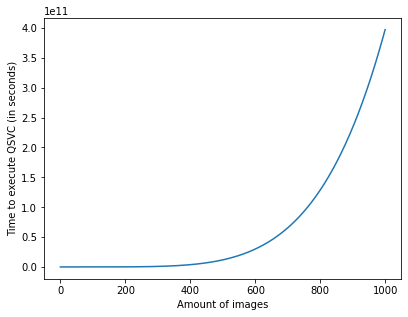  

In this paper : https://arxiv.org/pdf/2203.00031.pdf, is it described that running QSVC without any form of optimization would result in a run time sclaing with $O(M^{4.64}/\epsilon^2)$, with $M$ the amount of training data and $\epsilon$ a precision fixed by the feature map used and the amount of iterations allowed (considered constant when I traced the graph above).

After my own tests, the scores never went higher than 10%. This is mostly due to the amount of feature reduction we have to apply for the feature map circuit to fit on a local simulator. In most of my tests, I reduced the 784 features of the image to only 2, giving this graph :   
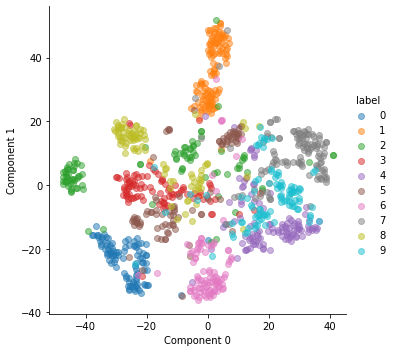  
We can observe the fact that, while some data looks separable, most of them are blended together, and finding an hyperplane (a line in this case) to separate a class from the other is an impossible task.

# The real interset of QSVC

As we saw before, deciding to use QSVC depends on the properties and size of the datasets. While it can be tricky for this algorithm to classify correctly images of handwritten numbers, QSVC is mostly used to classify data that we will call **complex**. These data does not merge with each other, but small nodes are spread, as we can see in this image :   
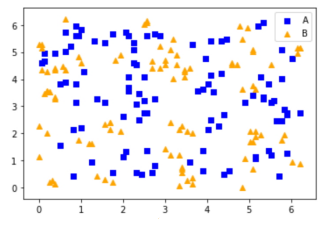  
This kind of dataset would be really hard for a classical svm to classify. But as we can use the complex property of certain feature map, each node can be classified correctly.

This image was taken from https://arxiv.org/pdf/2012.07725.pdf

We can see the result of the training of QSVC here :   
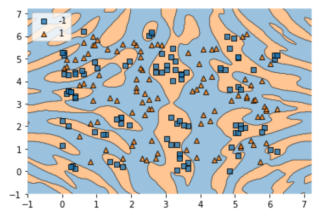

This image was taken from https://arxiv.org/pdf/2012.07725.pdf

# A special feature map

The trained QSVC we saw above was obtained with the **Pauli feature map**, created like so : 

In [4]:
def modify_pauli(circ, pv):
    import copy
    from qiskit.circuit.exceptions import CircuitError
    from qiskit.circuit.parametertable import ParameterReferences
    from qiskit.circuit import ParameterExpression
    from sympy import Mul,Symbol
    import warnings
    len_circ = len(circ)
    p_gates = [i for i in range(len_circ) if circ[i][0].name == 'p']
    if len_circ < len(pv):
        raise CircuitError("The amount of parameters in the parameter vector should not be greater than the amount of gates in the circuit")
    if len(p_gates) < len(pv):
        warnings.warn("Too much Parameters has been given, only the first "+str(len(p_gates))+" will be used",UserWarning)
    next_p = 0
    for index,i in enumerate(p_gates):
        old = copy.deepcopy(circ[i][0].params[0])
        new_expr = Mul(Symbol(pv[index].name), old.sympify())
        param_const = {pv[index] : pv[index].name}
        for param in old.parameters:
            param_const[param] = param.name
        Pe = ParameterExpression(param_const,new_expr)
        circ[i][0].params[0] = Pe
        circ._parameter_table[pv[index]] = ParameterReferences([(circ[i].operation,0)])

Before alpha modification


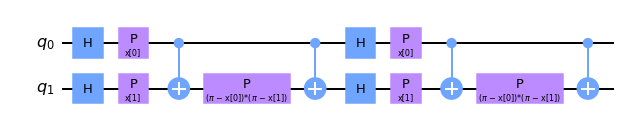

After alpha modification


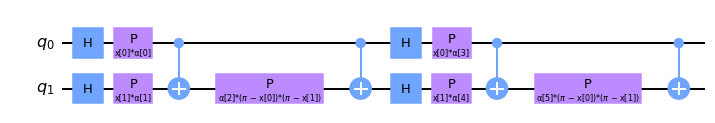

In [14]:
from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit import ParameterVector
pv = ParameterVector("α",6)
p = PauliFeatureMap(feature_dimension=2, alpha=1).decompose()
print("Before alpha modification")
display(p.draw(output = 'mpl'))
print("After alpha modification")
modify_pauli(p,pv)
display(p.draw(output = 'mpl'))

The existence of the ```modify_pauli``` procedure (that you can find in the notebook used to generate those slides) is justified by the theoretical formula of the Pauli feature map : 
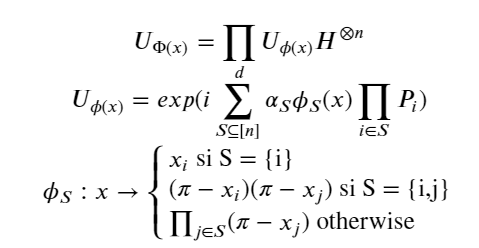  
This huge formula is encoded in the ```PauliFeatureMap``` object of Qiskit, except for $\alpha_S$, that we will need for later. The ```modify_pauli``` procedure is here to modify a ```PauliFeatureMap``` object that **needs to be decomposed using the ```decompose()``` function beforehand**, and add the parametrizable $\alpha_S$.

This feature map is interesting because of the properties of each blocks, summarized here :
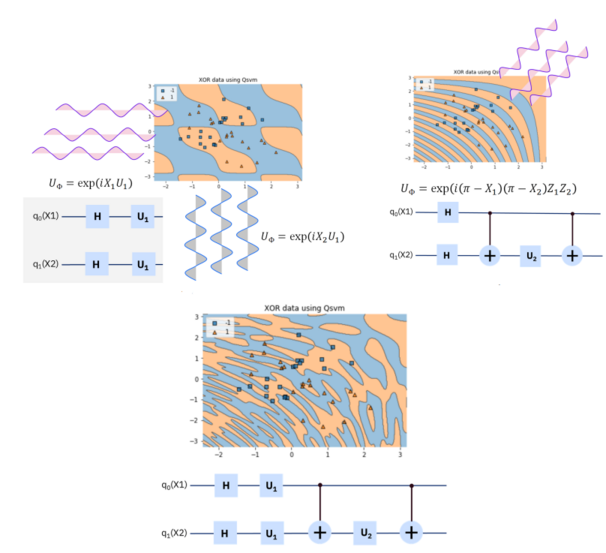  
This image was taken from https://arxiv.org/pdf/2012.07725.pdf

# Helping QSVC with another training : the Quantum Kernel Trainer

An idea to raise the training and testing socre of QSVC is to train another set of parameters with a more classical QML scheme. The **Quantum Kernel Trainer** is an algorithm similar to QSVC that can train some parameters of a feature map.  
For example, in the definition of the Pauli feature map above, the parameters $\alpha_S$ can be trained independently from the parameters used to encode the data.  
The quantum kernel trainer is used to adapt the kernel to the data in order to converge faster to the maximum SVM margin.
It has been proven in this article : https://arxiv.org/pdf/2203.00031.pdf that using the QuantumKernelTrainer removes the dependency of the convergence time of QSVC on the amount of data. Indeed, the amount of time for QSVC to converge now scales with $O(1/\epsilon^{2.9})$, $\epsilon$ a fixed precision.

In [2]:
from utils import *
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit.utils import QuantumInstance
from sklearn.decomposition import PCA
from qiskit.providers.aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2
import time
import numpy as np

In [12]:
train_data_image,train_label_image = import_full_image(howmuch=10)
test_data_image,test_label_image = import_full_image(howmuch = 5, imtype = "Testing")
pca = PCA(n_components=2)
train_data_image,test_data_image = pca.fit_transform(train_data_image),pca.fit_transform(test_data_image)
feature_map_no_optim = PauliFeatureMap(2)
qinst = QuantumInstance(backend=AerSimulator(method = "automatic"))
kernel = QuantumKernel(feature_map=feature_map_no_optim, quantum_instance=qinst)
qsvc = QSVC(quantum_kernel=kernel)
start = time.time()
qsvc.fit(train_data_image,train_label_image)
end = time.time()
print("QSVC without kernel optimization converged in ",(end-start)," seconds with a training score of ",qsvc.score(train_data_image,train_label_image)," and a testing score of ",qsvc.score(test_data_image,test_label_image))


QSVC without kernel optimization converged in  50.27574682235718  seconds with a training score of  0.36  and a testing score of  0.1


In [18]:
user_parameters = ParameterVector("a",6)
feature_map_optim = PauliFeatureMap(2,alpha = 1).decompose()
modify_pauli(feature_map_optim,user_parameters)
kernel_optim = QuantumKernel(feature_map = feature_map_optim,user_parameters=user_parameters, quantum_instance = qinst)
optimizer = SPSA()
qkt = QuantumKernelTrainer(quantum_kernel = kernel_optim,optimizer = optimizer)
start = time.time()
qkt_result = qkt.fit(train_data_image,train_label_image)
end = time.time()
print("Qkt has been trained in ",end-start," seconds")
qsvc_optim = QSVC(quantum_kernel = qkt_result.quantum_kernel)
start = time.time()
qsvc_optim.fit(train_data_image,train_label_image)
end = time.time()
print("QSVC without kernel optimization converged in ",(end-start)," seconds with a training score of ",qsvc_optim.score(train_data_image,train_label_image)," and a testing score of ",qsvc_optim.score(test_data_image,test_label_image))


Qkt has been trained in  28626.01476073265  seconds
QSVC without kernel optimization converged in  71.4442503452301  seconds with a training score of  0.41  and a testing score of  0.06


### Lets try with a feature map with less features
Lets try with another dataset that has less feature, so we will be able to encode them all without using too much qubits. The dataset is about the sign of a COVID infection, and the goal is to predict if an infection will lead to a severe case of COVID or not.

In [16]:
#Importing the covid data in form of a dictionnary. The severity other than severe are removed
# And the country factor is removed as well to avoid having to encode it and avoid makinf our model
# too complicated
import pandas as pd
cov_dict = pd.read_csv('covid.csv').to_dict()
cov_dict.pop('Severity_Mild',None)
cov_dict.pop('Severity_Moderate',None)
cov_dict.pop('Severity_None',None)
cov_dict.pop('Country',None);
y = cov_dict.pop('Severity_Severe',None)
y_list = np.array(list(y.values()))
x = cov_dict
x.keys()

dict_keys(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes'])

In [17]:
# We shuffle our data before training and extract the 20 best components (out of 22)
#Shuffling
import random
x_list = np.array([np.array([x.get(k)[i] for k in list(x.keys())]) for i in range(len(x.get('Fever')))])
enum = list(enumerate(x_list))
random.shuffle(enum)
index, _ = zip(*enum)
x_shuffle = x_list[index,:]
y_shuffle = y_list[list(index)]
#Extracting
from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(score_func=chi2, k=20)
x_shuffle = select.fit_transform(x_shuffle,y_shuffle)

In [18]:
#Lets start by training using a portion of the dataset
train_data = x_shuffle[0:100]#100 training data
train_label = y_shuffle[0:100]
test_data = x_shuffle[100:200]#100 testing data
test_label = y_shuffle[100:200]

In [11]:
feature_map = EfficientSU2(num_qubits=2,reps =4, parameter_prefix='in')
qinst = QuantumInstance(backend = AerSimulator())
kernel = QuantumKernel(feature_map = feature_map, quantum_instance=qinst)
qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_data,train_label)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x000001D18A496880>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [12]:
print("Training score : ",qsvc.score(train_data,train_label))
print("Testing score : ",qsvc.score(test_data,test_label))

Training score :  0.74
Testing score :  0.77


# Hybrid Neural Networks

### A simple concept
The goal of hybrid neural networks is to replace a layer of classical neurons with quantum ones. It is prefered to replace the last layer of neurons for multiple reasons : 
* As quantum circuit can be run on real backend, noise is introduced in the neural network, reducing the score.
* One of the main problem of today's real backend is the amount of qubits present in the system. The first layers of a neural network usually have a huge amount of input as it represents the amount of feature in your data (take 784 for a MNIST data for example). Thus, introducing a quantum circuit this early in the neural network will slow the whole network down.

### PyTorch : the concrete implementation
Implementing an hybrid neural network can be done with the help of the pytorch library (tutorials can be found here : https://pytorch.org/tutorials/beginner/basics/intro.html). One of the most interesting thing about pytorch is the **autograd** module, that automatically computes the gradient of the neurons / layer you add to your neural network, each time a forward pass is computed. This addition is really useful, but needs the user to understand how their neural networks works to decide weither to compute the gradient or not (for example, you do not want to compute the gradient when you run your scoring algorithm).

### Important note : 
For some obscure reason, importing torchvision crashes the kernel when executing your code from a jupyter notebook. The following lines must be added before importing torchvision:

In [3]:
#solve a problem that makes the kernel crash when using torchvision
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### Modules
Pytorch is mostly articulated around two modules : ```torch.nn``` and ```torch.nn.functional```. Extending these modules allows : 
* **nn.functional**: the user can define its own type of neuron if it does not want to use the many pre-implemented layer-generation algorithms such as ReLu or Linear.
* **nn** : the user defines its neural network, layer by layer, and can add its own neurons.

### The quantum circuit builder
This class is here to simplify the use of a quantum neuron.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

import time

```python
class QuantumCircuitBuilder:
    r""" 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    def __init__(self, n_qubits, backend, shots,device):
        """
        Args : 
            n_qubits : the number of qubits of the circuit.
            backend : the backend on which the circuit will be run. If the backend is a GPU simulator, device must be
            equal to "GPU".
            shots : the amount of shots per circuit execution.
            device : either "CPU" or "GPU". If device = "GPU" then the backend must accept GPU computation.
        """
        # --- Circuit definition ---
        #This circuit is a simple circuit, but can be adapted to much more complicated ones
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        #The rest of the program considers that measurement has been added
```      

```python
        self.device = device
        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        expectation_list = []
        #Check if the result is a dict or a list of dict (in case of multiple executions)
        #Then compute the probability distribution
        if not isinstance(result,dict):
            for res in result:
                counts = np.array(list(res.values()))
                states = np.array(list(res.keys())).astype(float)
                # Compute probabilities for each state
                probabilities = counts / self.shots
                # Get state expectation
                expectation_list.append(np.sum(states * probabilities))
            return np.array(expectation_list)
        else:
            counts = np.array(list(result.values()))
            states = np.array(list(result.keys())).astype(float)
            probabilities = counts/self.shots
            expectation = np.sum(states*probabilities)
            return np.array([expectation])
```

In [10]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        
        all_qubits = [i for i in range(n_qubits)]
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        self._circuit.ry(self.theta, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        expectation_list = []
        if not isinstance(result,dict):
            for res in result:
                counts = np.array(list(res.values()))
                states = np.array(list(res.keys())).astype(float)


                # Compute probabilities for each state
                probabilities = counts / self.shots
                # Get state expectation
                expectation_list.append(np.sum(states * probabilities))
            return np.array(expectation_list)
        else:
            counts = np.array(list(result.values()))
            states = np.array(list(result.keys())).astype(float)
            probabilities = counts/self.shots
            expectation = np.sum(states*probabilities)
            return np.array([expectation])

### Re-defining the forward and backward pass
As the behavior of the quantum circuit is really different from the normal behavior of an activation function, we must define how the output of the activation function will be computed and how the parameters will be optimized.

```python
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        #The shift parameter will be used in the backward pass to compute the gradient
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit
        #Expectation z computes the output of the neurons
        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        #The output of the neurons must be converted back to a torch tensor to be
        #used in the rest of the network
        result = torch.tensor([expectation_z])
        #The input and output are saved to be used later in the computation of the 
        #backward pass
        ctx.save_for_backward(input, result)
        return result
```

```python
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        #The tensors saved in the forward pass are retrieved here
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        #Computing the parameter shift gradient
        #Other methods of computing gradients can be found here 
        #https://qiskit.org/documentation/tutorials/operators/02_gradients_framework.html
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        #The apply method calls the forward method of the object
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)
```

In [15]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        #The shift parameter will be used in the backward pass to compute the gradient
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit
        #Expectation z computes the output of the neurons
        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        #The output of the neurons must be converted back to a torch tensor to be
        #used in the rest of the network
        result = torch.tensor([expectation_z])
        #The input and output are saved to be used later in the computation of the 
        #backward pass
        ctx.save_for_backward(input, result)
        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        #The tensors saved in the forward pass are retrieved here
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        #Computing the parameter shift gradient
        #Other methods of computing gradients can be found here 
        #https://qiskit.org/documentation/tutorials/operators/02_gradients_framework.html
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        #The apply method calls the forward method of the object
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

### Building the network
Now that we have defined our custom node, we can build the neuron network. The network built in this presentation is a special type of network called a **convolutional network**. It is made to specifically classify the data from the MNIST dataset. The only change is that we are switching the last fully connected layer with our quantum layer, and we take the output of the circuits as classifications.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)#Convolutional layers with 1 input and 6 outputs
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()#Randomly force neuron to output zero
        self.fc1 = nn.Linear(256, 64)#Linear activation function with 256 inputs and 64 outputs
        self.fc2 = nn.Linear(64, 10)
        #10 hybrid neurons with a shift parameter of π/2 for the computation of the gradient
        self.hybrid = [Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2) for _ in range(10)]

    def forward(self, x):
        x = F.relu(self.conv1(x))#Activation function : relu, neuron computation : convolutional
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)#reshape the tensor after the dropout
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.chunk(x,10,dim=1)#Separate the inputs in 10 chunks
        x = tuple([hy(x_) for hy,x_ in zip(self.hybrid, x)])#Computing the output of the quantum neurons
        return torch.cat(x,-1)#Concatenate outputs of the neurons that we splitted two lines above
```

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)#Convolutional layers with 1 input and 6 outputs
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()#Randomly force neuron to output zero
        self.fc1 = nn.Linear(256, 64)#Linear activation function with 256 inputs and 64 outputs
        self.fc2 = nn.Linear(64, 10)
        #10 hybrid neurons with a shift parameter of π/2 for the computation of the gradient
        self.hybrid = [Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2) for _ in range(10)]

    def forward(self, x):
        x = F.relu(self.conv1(x))#Activation function : relu, neuron computation : convolutional
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)#reshape the tensor after the dropout
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.chunk(x,10,dim=1)#Separate the inputs in 10 chunks
        x = tuple([hy(x_) for hy,x_ in zip(self.hybrid, x)])#Computing the output of the quantum neurons
        return torch.cat(x,-1)#Concatenate outputs of the neurons that we splitted two lines above
        

# Importing the data

In [19]:
#We will focus on the first 100 images for training
n_samples = 100
#PyTorch has a useful command to import the data of MNIST. 
#Adding download = True allows the user to download it in place
X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))
X_train.data = X_train.data[:n_samples]
X_train.targets = X_train.targets[:n_samples]
#The train_loader object is an utility added by Pytorch to handle the data more easly
train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

In [20]:
#We import 50 testing images
n_samples = 50
X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))
X_test.data = X_test.data[:n_samples]
X_test.targets = X_test.targets[:n_samples]
test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)

# Run the optimization process

In [22]:
model = Net()
#SGD, the schocastic gradient descent, is the same as qiskit's SPSA
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum = 0.9)
loss_func = nn.CrossEntropyLoss()
#Amount of forward-backward run to do. The more epoch you have, the more precise your neural network will be
epochs = 20
loss_list = []
#Activate the train mode of the model.
#If it was in eval mode, the gradient would not be computed
model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        #Reset the gradient
        optimizer.zero_grad()
        # Compute the output of the neural network over the training data
        output = model(data)
        # Computing the loss funciton
        loss = loss_func(output, target)
        # Compute the gradient of the parameters of the neurons
        loss.backward()
        # Optimize the parameters of the neurons
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

C:\Users\108997~1\AppData\Local\Temp/ipykernel_13504/1495006954.py:37: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  gradients = np.array([gradients]).T


Training [5%]	Loss: 2.3109
Training [10%]	Loss: 2.2990
Training [15%]	Loss: 2.2992
Training [20%]	Loss: 2.2807
Training [25%]	Loss: 2.2516
Training [30%]	Loss: 2.2304
Training [35%]	Loss: 2.1646
Training [40%]	Loss: 2.0858
Training [45%]	Loss: 2.0039
Training [50%]	Loss: 1.9506
Training [55%]	Loss: 1.8905
Training [60%]	Loss: 1.8742
Training [65%]	Loss: 1.8430
Training [70%]	Loss: 1.7951
Training [75%]	Loss: 1.7611
Training [80%]	Loss: 1.7339
Training [85%]	Loss: 1.7343
Training [90%]	Loss: 1.7251
Training [95%]	Loss: 1.7141
Training [100%]	Loss: 1.6801


# Scoring the neural network 

In [30]:
#The two following lines are used to block the computation of the gradient,
#avoiding the neural network to be weirdly optimized
model.eval()
with torch.no_grad():
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True) 
        correct += pred.eq(target.view_as(pred)).sum().item()
        loss = loss_func(output, target)
        total_loss.append(loss.item())
        
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
        )

Performance on test data:
	Loss: 1.7432
	Accuracy: 74.0%


# Conclusion

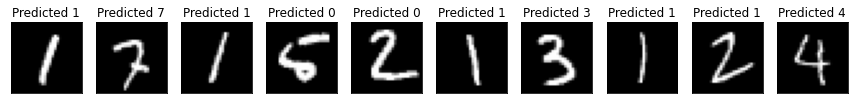

In [27]:
n_samples_show = 10
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(15, 3))

model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 

        axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))
        
        count += 1

Training on  cuda  took  570.219428062439 s ,Training on CPU took  326.57120060920715 s